<a href="https://colab.research.google.com/github/KevinCris2021/KevinCris2021/blob/main/Ejercicios_Github_Clasificacion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Balanza**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/1. Base de Datos Python /Clustering/balance-scale.data')
df.columns = ['Clase','IzquierdaPeso','IzquierdaDistancia','DerechaPeso','DerechaDistancia']

In [6]:
df.head()

,Clase,IzquierdaPeso,IzquierdaDistancia,DerechaPeso,DerechaDistancia
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [7]:
len(df)

624

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Clase               624 non-null    object
 1   IzquierdaPeso       624 non-null    int64 
 2   IzquierdaDistancia  624 non-null    int64 
 3   DerechaPeso         624 non-null    int64 
 4   DerechaDistancia    624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [9]:
df.describe()

,IzquierdaPeso,IzquierdaDistancia,DerechaPeso,DerechaDistancia
count,624.000000,624.000000,624.000000,624.000000
mean,3.003205,3.003205,3.003205,3.003205
std,1.414210,1.414210,1.414210,1.414210
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


Este conjunto de datos se generó para modelar la psicología
resultados experimentales. Cada ejemplo se clasifica como teniendo el
Equilibrar la punta de la balanza hacia la derecha, la punta hacia la izquierda o ser
equilibrado. Los atributos son el peso izquierdo, el izquierdo
distancia, el peso correcto y la distancia correcta. los
La forma correcta de encontrar la clase es la mayor de
(distancia a la izquierda * peso a la izquierda) y (distancia a la derecha *
peso correcto). Si son iguales, está equilibrado.

In [ ]:
df.hist(bins = 5, figsize=(20,20),color= 'r')

In [23]:
correlations = df.corr()

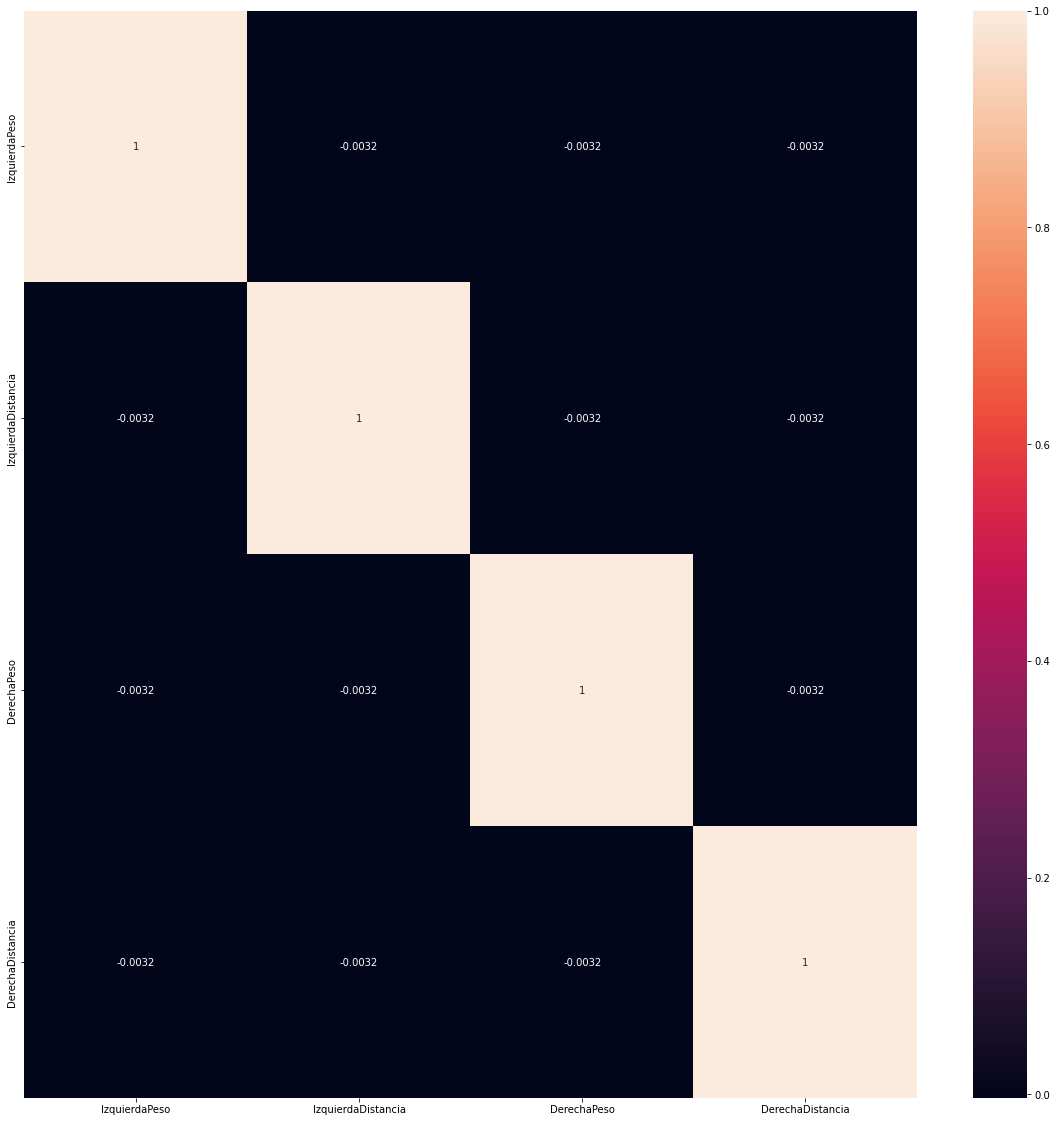

In [24]:
f,ax = plt.subplots (figsize =(20,20))
sns.heatmap(correlations,annot=True)

In [25]:
n = len(df.columns)
n

5

In [39]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [37]:
for i in df.columns:
  print(i,df[i].unique())

Clase ['R' 'L' 'B']
IzquierdaPeso [1 2 3 4 5]
IzquierdaDistancia [1 2 3 4 5]
DerechaPeso [1 2 3 4 5]
DerechaDistancia [2 3 4 5 1]


In [41]:
df['Clase'] = df['Clase'].replace({"R": 1, "L": 2,'B':0})

In [42]:
df.head()

,Clase,IzquierdaPeso,IzquierdaDistancia,DerechaPeso,DerechaDistancia
0,1,1,1,1,2
1,1,1,1,1,3
2,1,1,1,1,4
3,1,1,1,1,5
4,1,1,1,2,1


In [43]:
df['Clase'].unique()

array([1, 2, 0])

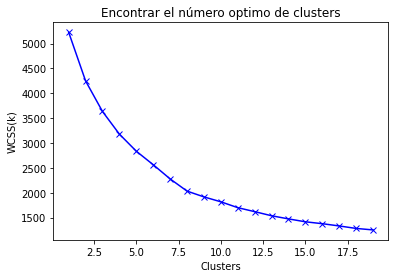

In [44]:
scores_1 = []

range_values = range(1,20)

for i in range_values:

  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df)
  scores_1.append(kmeans.inertia_)

plt.plot(range_values,scores_1, 'bx-')
plt.title('Encontrar el número optimo de clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS(k)')
plt.show()

Aplicación de Método KMeans

In [48]:
kmeans = KMeans(8)
kmeans.fit(df)
labels = kmeans.labels_

In [ ]:
labels

In [50]:
kmeans.cluster_centers_.shape

(8, 5)

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns= [df.columns])
cluster_centers

,Clase,IzquierdaPeso,IzquierdaDistancia,DerechaPeso,DerechaDistancia
0,1.918605,4.197674,2.255814,1.906977,1.872093
1,0.884615,1.833333,4.230769,3.884615,4.153846
2,2.000000,3.954545,4.212121,4.151515,1.681818
3,0.922222,1.722222,1.977778,3.988889,2.077778
4,2.000000,4.026316,4.302632,1.921053,3.973684
5,0.866667,4.133333,2.077778,4.200000,3.933333
6,0.962500,2.175000,1.800000,1.862500,4.162500
7,1.862069,1.758621,4.068966,1.741379,1.758621


In [53]:
df_cluster = pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)

df_cluster.head()

,Clase,IzquierdaPeso,IzquierdaDistancia,DerechaPeso,DerechaDistancia,cluster
0,1,1,1,1,2,6
1,1,1,1,1,3,6
2,1,1,1,1,4,6
3,1,1,1,1,5,6
4,1,1,1,2,1,3


In [ ]:
#visualización histogramas para cada cluster

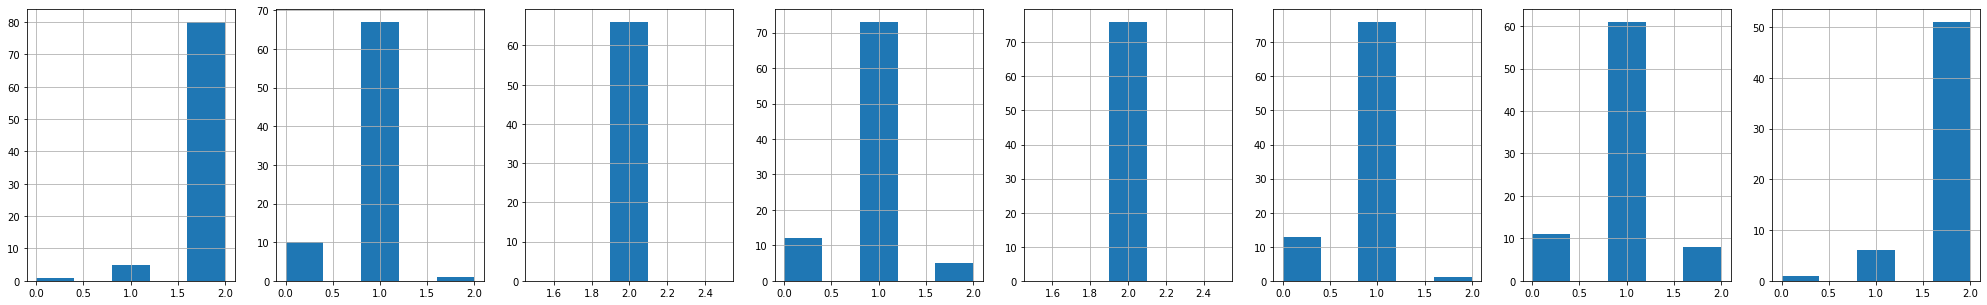

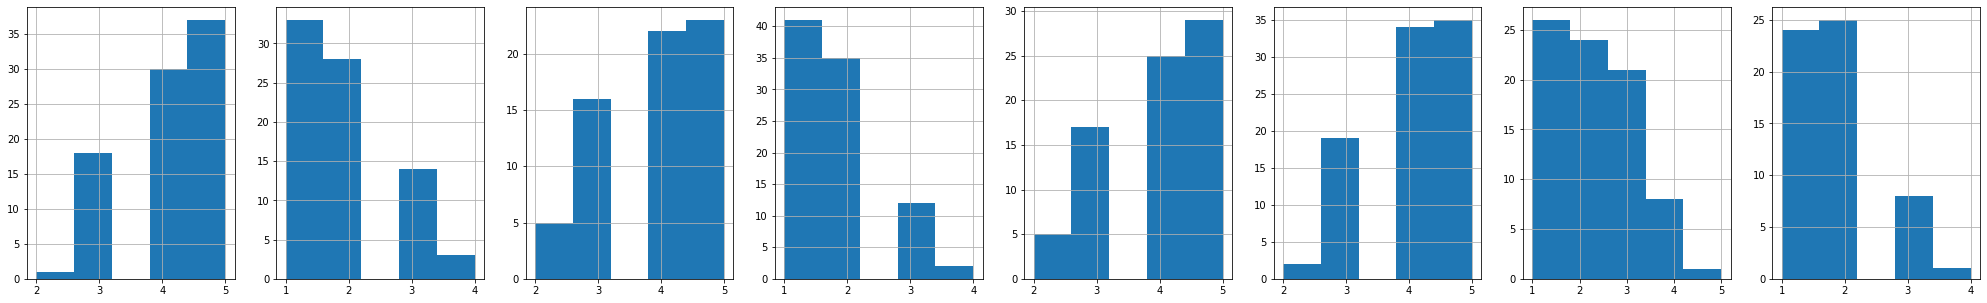

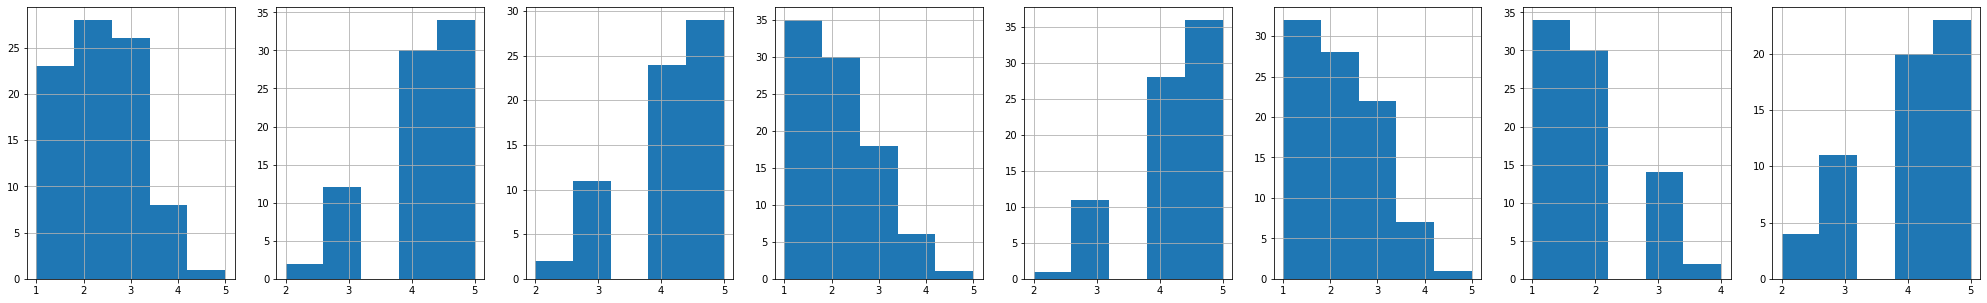

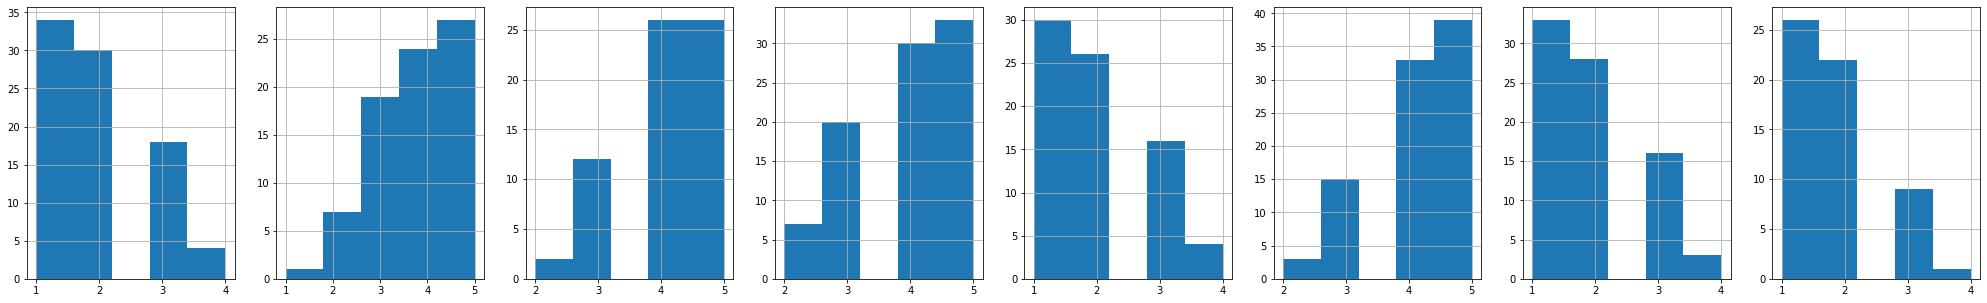

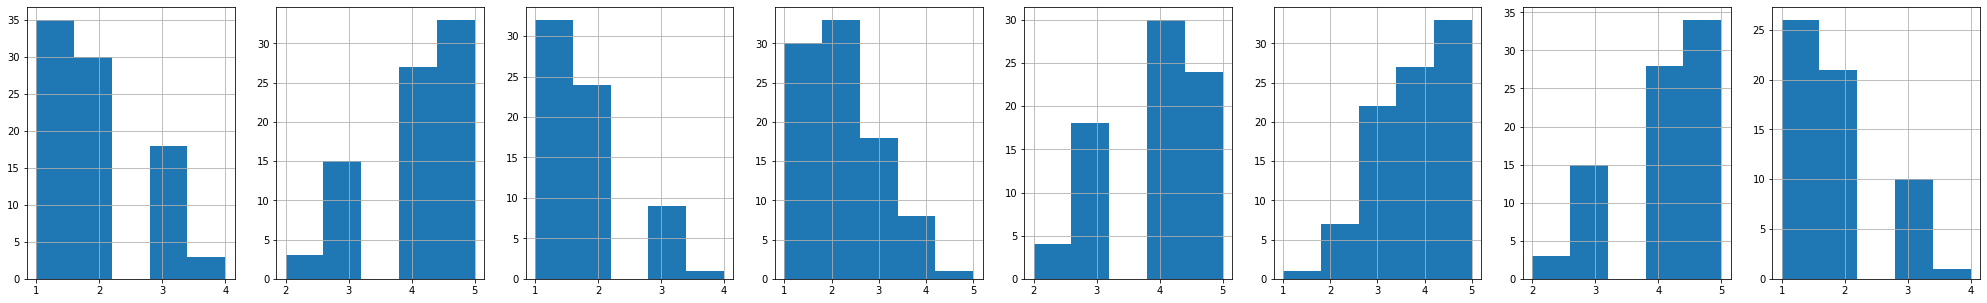

In [55]:
for i in df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster']==j]
    cluster[i].hist(bins= 5 )
    
plt.show()

In [56]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df)
principal_comp

array([[-6.20960926e-01,  6.96817014e-01],
       [-1.09400463e+00,  1.39363403e+00],
       [-1.56704833e+00,  2.09045104e+00],
       ...,
       [ 1.16280726e+00, -1.39363403e+00],
       [ 6.89763557e-01, -6.96817014e-01],
       [-3.80486754e-01,  6.33672044e-14]])

In [57]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.620961,0.696817
1,-1.094005,1.393634
2,-1.567048,2.090451
3,-2.040092,2.787268
4,-0.620961,-0.696817


In [58]:
#Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.620961,0.696817,6
1,-1.094005,1.393634,6
2,-1.567048,2.090451,6
3,-2.040092,2.787268,6
4,-0.620961,-0.696817,3


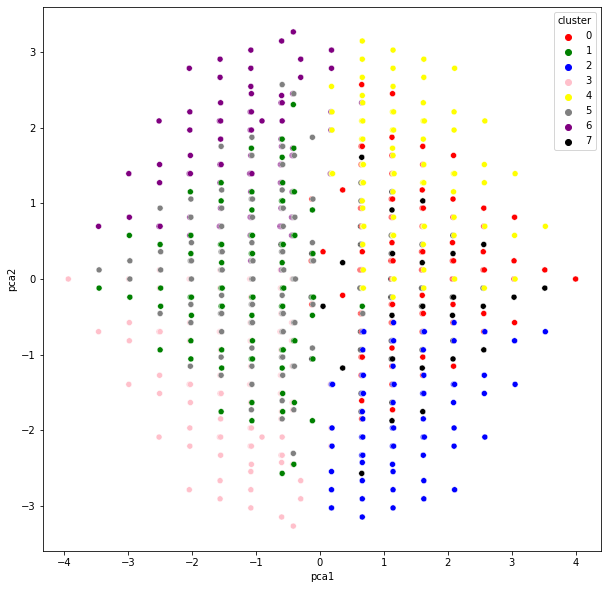

In [60]:
plt.figure(figsize=(10,10))

ax= sns.scatterplot(x= 'pca1',y= 'pca2',hue= 'cluster',data= pca_df,
                     palette = ['red','green','blue','pink','yellow','gray','purple','black'])

plt.show()